In [1]:
import SimpSOM as sps
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics


In [2]:
dados = pd.read_csv("Admission_Predict.csv")
dados.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
dados['GRE Score'] = (dados['GRE Score'] - dados['GRE Score'].min()) / (dados['GRE Score'].max() - dados['GRE Score'].min())
dados['TOEFL Score'] = (dados['TOEFL Score'] - dados['TOEFL Score'].min()) / (dados['TOEFL Score'].max() - dados['TOEFL Score'].min())
dados['University Rating'] = (dados['University Rating'] - dados['University Rating'].min()) / (dados['University Rating'].max() - dados['University Rating'].min())
dados['SOP'] = (dados['SOP'] - dados['SOP'].min()) / (dados['SOP'].max() - dados['SOP'].min())
dados['LOR '] = (dados['LOR '] - dados['LOR '].min()) / (dados['LOR '].max() - dados['LOR '].min())
dados['CGPA'] = (dados['CGPA'] - dados['CGPA'].min()) / (dados['CGPA'].max() - dados['CGPA'].min())
dados['Research'] = (dados['Research'] - dados['Research'].min()) / (dados['Research'].max() - dados['Research'].min())
dados['Chance of Admit '] = (dados['Chance of Admit '] - dados['Chance of Admit '].min()) / (dados['Chance of Admit '].max() - dados['Chance of Admit '].min())


In [4]:
media = dados['Chance of Admit '].mean()
dados[(dados[["Chance of Admit "]] >= media)] = 1
dados[(dados[["Chance of Admit "]] <= media)] = 0
dados.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,1.0
1,2,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,1.0
2,3,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.0
3,4,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,1.0
4,5,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.0


In [27]:
## adicionando em um array
X = dados.iloc[:, 1:7].values
X

array([[0.94      , 0.92857143, 0.75      , 0.875     , 0.875     ,
        0.91346154],
       [0.68      , 0.53571429, 0.75      , 0.75      , 0.875     ,
        0.66346154],
       [0.52      , 0.42857143, 0.5       , 0.5       , 0.625     ,
        0.38461538],
       ...,
       [0.8       , 0.85714286, 0.75      , 1.        , 0.875     ,
        0.84935897],
       [0.44      , 0.39285714, 0.5       , 0.625     , 0.75      ,
        0.63461538],
       [0.86      , 0.89285714, 0.75      , 1.        , 0.75      ,
        0.91666667]])

### Criando uma rede 20x20 e ativando o Periodic Boundary Conditions (PBC).

In [28]:
net = sps.somNet(20, 20, X, PBC=True)

Periodic Boundary Conditions active.
The weights will be initialised randomly.


### Treinando a rede por 10000 interações e com taxa de aprendizado inicial de 0,01

In [8]:
net.train(0.01, 10000)

Training SOM... done!


In [9]:
net.save('Admission_Predict_weights')

In [29]:
import numpy as np
lista = []
pesos = open("qthresh_clusters.dat","r")
for c in pesos:
    lista.append(list (map(lambda x: int(x), c.split())))
entradas = [0]*400
for index,d in enumerate(lista):
    for elemento in d:
        entradas[elemento] = index
    

In [30]:
X = dados.iloc[:, 1:6].values

In [31]:
metrics.silhouette_score(X,entradas)

-0.0196454661435207

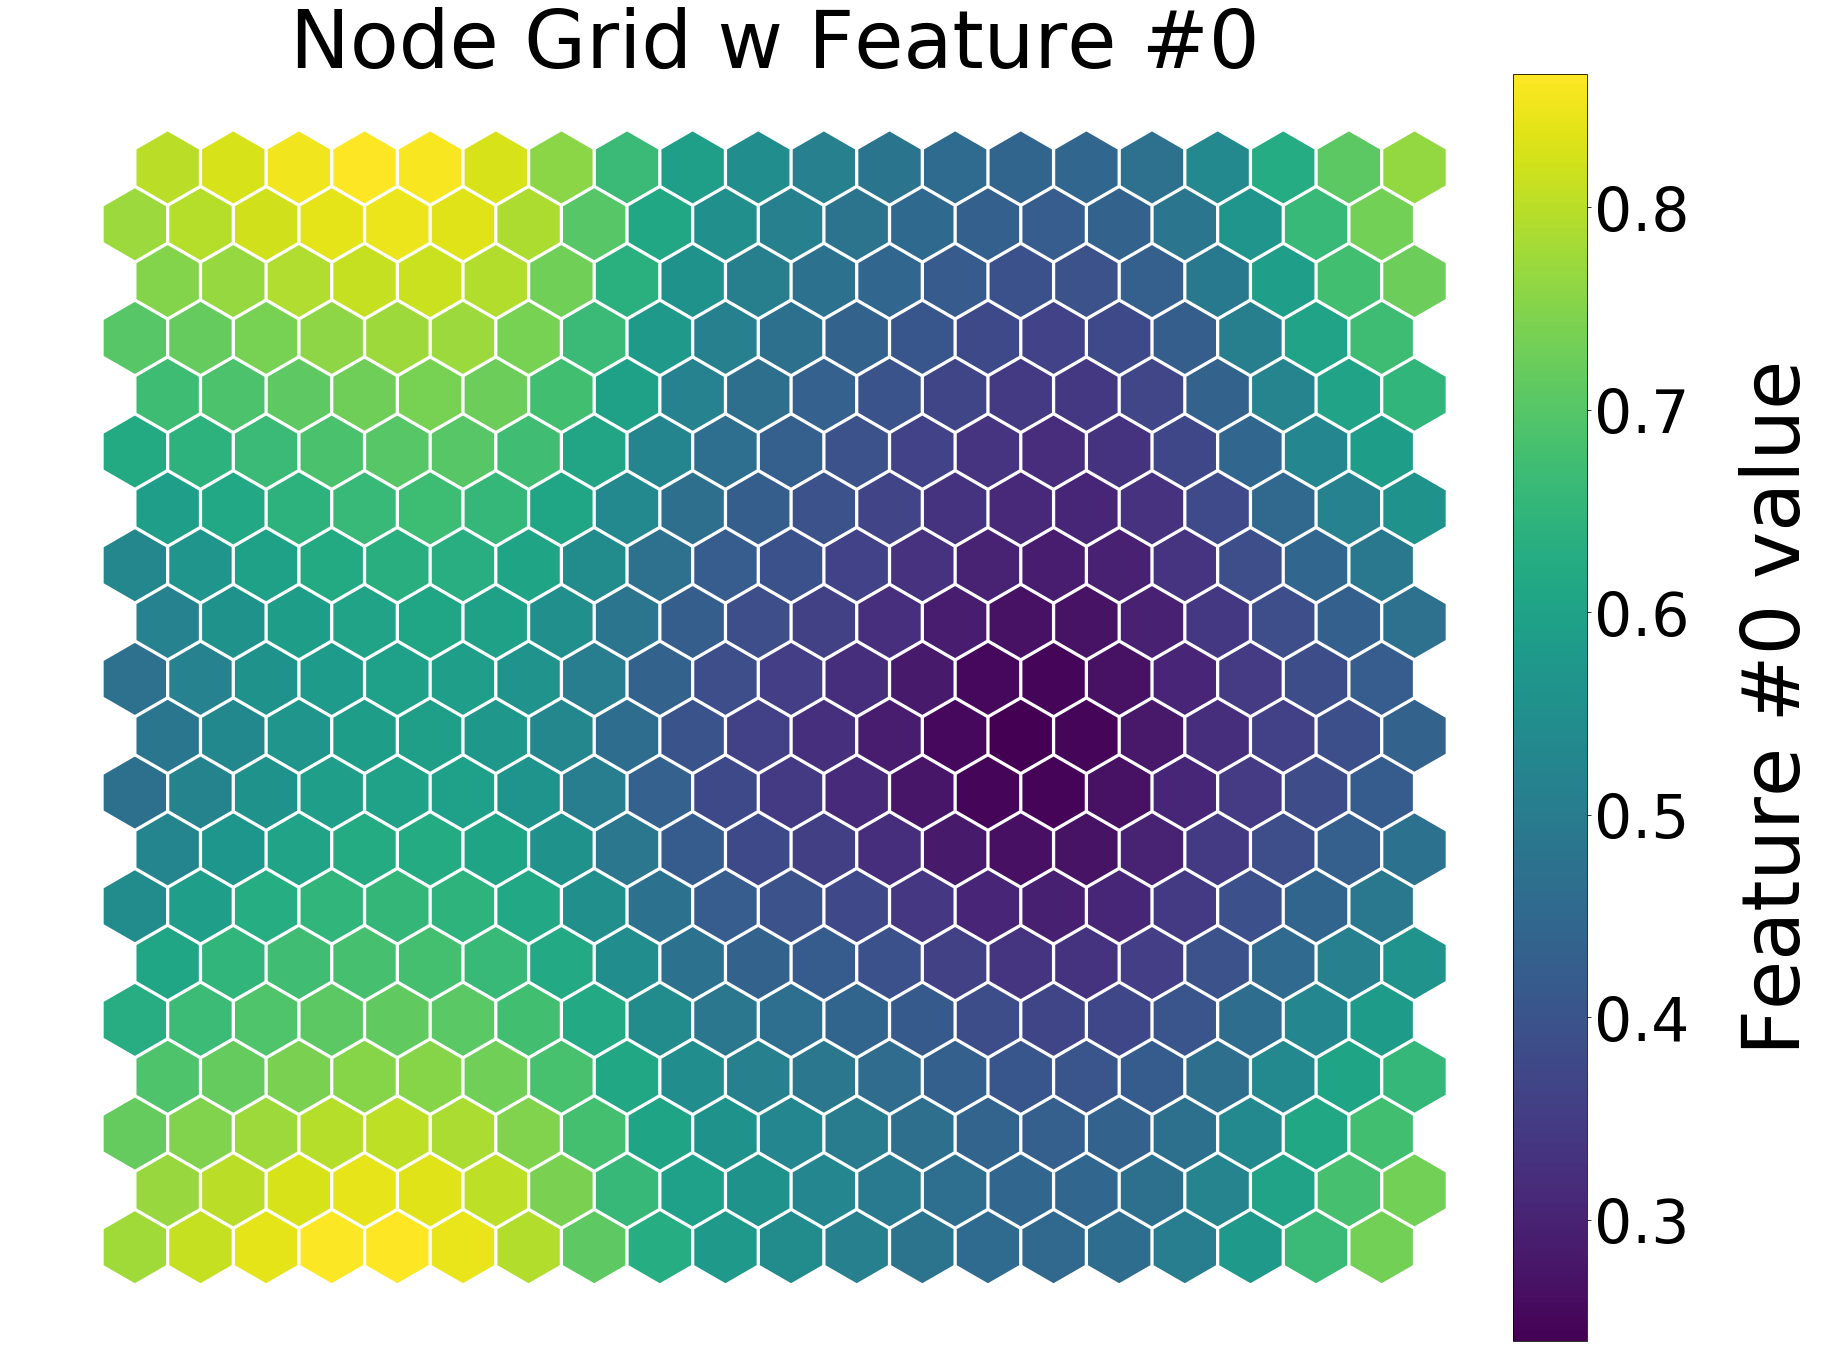

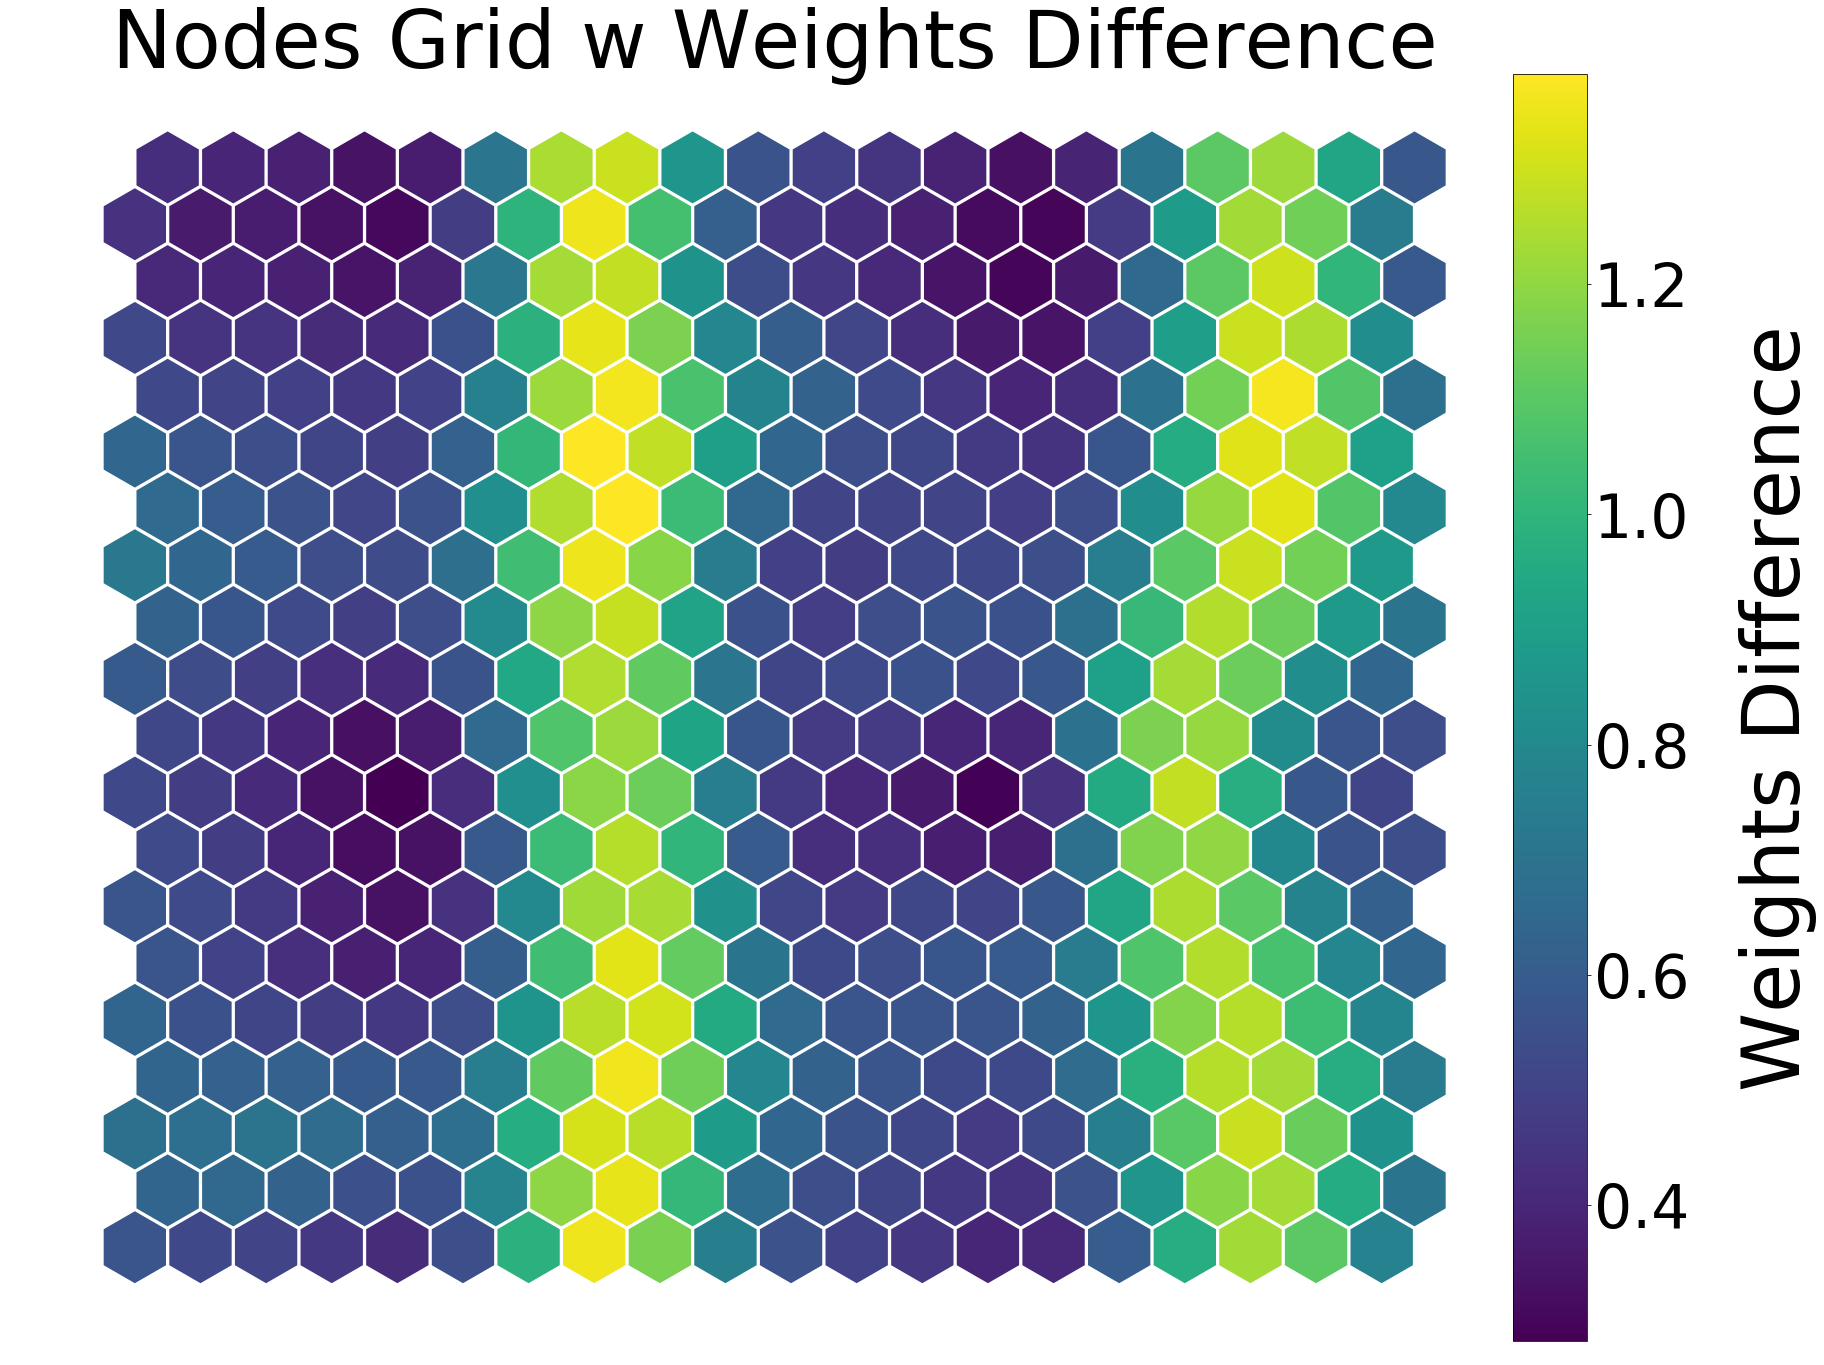

In [10]:
net.nodes_graph(colnum=0)
net.diff_graph()

In [11]:
net.project(X, labels=[4])

[[4, 0.0],
 [2.5, 11.258330249197702],
 [0, 8.660254037844387],
 [0, 3.4641016151377553],
 [10.5, 4.330127018922194],
 [1, 0.0],
 [3.5, 7.794228634059948],
 [12.5, 11.258330249197702],
 [13, 6.9282032302755105],
 [10.5, 0.8660254037844388],
 [3, 8.660254037844387],
 [4, 12.124355652982143],
 [4, 12.124355652982143],
 [19.5, 9.526279441628825],
 [19, 5.196152422706632],
 [13.5, 0.8660254037844388],
 [11, 0.0],
 [1, 8.660254037844387],
 [10, 0.0],
 [14.5, 12.99038105676658],
 [19, 5.196152422706632],
 [10, 1.7320508075688776],
 [3.5, 14.722431864335457],
 [4, 15.588457268119896],
 [2, 0.0],
 [3.5, 16.454482671904337],
 [9, 15.588457268119896],
 [17, 6.9282032302755105],
 [13, 6.9282032302755105],
 [13.5, 6.062177826491071],
 [18, 6.9282032302755105],
 [1.5, 9.526279441628825],
 [3.5, 0.8660254037844388],
 [2.5, 16.454482671904337],
 [3.5, 14.722431864335457],
 [2, 13.856406460551021],
 [12.5, 12.99038105676658],
 [13, 6.9282032302755105],
 [12.5, 7.794228634059948],
 [12, 12.124355652982

<Figure size 2000x2000 with 0 Axes>

![title](projection_difference.png)

In [13]:
net.cluster(X, type='qthresh')

[[0,
  3,
  5,
  22,
  23,
  24,
  25,
  32,
  33,
  34,
  35,
  44,
  45,
  46,
  49,
  52,
  53,
  69,
  70,
  71,
  72,
  75,
  76,
  81,
  82,
  83,
  84,
  97,
  98,
  99,
  104,
  107,
  108,
  120,
  121,
  126,
  127,
  128,
  129,
  130,
  134,
  138,
  140,
  141,
  142,
  143,
  144,
  145,
  147,
  148,
  150,
  151,
  152,
  164,
  171,
  176,
  186,
  187,
  188,
  189,
  190,
  192,
  193,
  202,
  203,
  211,
  212,
  213,
  214,
  215,
  218,
  229,
  231,
  234,
  235,
  237,
  242,
  243,
  245,
  248,
  249,
  250,
  253,
  259,
  260,
  263,
  264,
  275,
  276,
  283,
  284,
  285,
  286,
  287,
  298,
  306,
  307,
  318,
  319,
  325,
  328,
  330,
  337,
  340,
  341,
  356,
  361,
  362,
  365,
  371,
  372,
  373,
  384,
  385,
  392,
  394,
  395,
  396,
  397,
  399],
 [4,
  7,
  8,
  27,
  28,
  29,
  30,
  37,
  38,
  39,
  51,
  56,
  57,
  58,
  59,
  60,
  62,
  77,
  78,
  79,
  92,
  93,
  94,
  95,
  96,
  101,
  117,
  118,
  125,
  137,
  146,
  1

<Figure size 432x288 with 0 Axes>

![title](qthresh_clusters.png)